<a href="https://colab.research.google.com/github/Octave-Horlin/NLP/blob/main/LabIntroMathsOpti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Optimisation

This notebook covers analytical computation of critical points, function visualization, and analysis using contour plots and gradient/hessian computations.


In [1]:
%pip install sympy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, Matrix, solve, simplify
import warnings
warnings.filterwarnings('ignore')


## Function Definitions

We define the three functions to analyze:
- f1(x,y) = x³ + y³ − 3x − 12y
- f2(x,y) = x³ − 12xy + 8y³
- f3(x,y) = (x−1)² + 10(x² − y)²


In [3]:
# Define functions using numpy for numerical evaluation
def f1(x, y):
    return x**3 + y**3 - 3*x - 12*y

def f2(x, y):
    return x**3 - 12*x*y + 8*y**3

def f3(x, y):
    return (x - 1)**2 + 10*(x**2 - y)**2


## Exercise 1: Analytical Computation of Critical Points

We compute the critical points analytically by finding where the gradient is zero, then classify them using the Hessian matrix.


### Function f1(x,y) = x³ + y³ − 3x − 12y


In [4]:
# Define symbolic variables
x, y = symbols('x y', real=True)

# Define f1 symbolically
f1_sym = x**3 + y**3 - 3*x - 12*y

# Compute partial derivatives
df1_dx = diff(f1_sym, x)
df1_dy = diff(f1_sym, y)

print("Partial derivatives of f1:")
print(f"∂f1/∂x = {df1_dx}")
print(f"∂f1/∂y = {df1_dy}")

# Solve for critical points (where gradient is zero)
critical_points_f1 = solve([df1_dx, df1_dy], [x, y], dict=True)
print(f"\nCritical points of f1: {critical_points_f1}")

# Compute Hessian matrix
H_f1 = Matrix([[diff(df1_dx, x), diff(df1_dx, y)],
               [diff(df1_dy, x), diff(df1_dy, y)]])
print(f"\nHessian matrix of f1:\n{H_f1}")

# Classify each critical point
print("\nClassification of critical points:")
for i, cp in enumerate(critical_points_f1):
    x_val = cp[x]
    y_val = cp[y]
    H_eval = H_f1.subs([(x, x_val), (y, y_val)])
    eigenvalues = H_eval.eigenvals()
    det = H_eval.det()
    trace = H_eval.trace()

    print(f"\nPoint {i+1}: ({x_val}, {y_val})")
    print(f"  Determinant: {det}")
    print(f"  Trace: {trace}")
    print(f"  Eigenvalues: {eigenvalues}")

    if det > 0 and trace > 0:
        print("  Nature: Local minimum")
    elif det > 0 and trace < 0:
        print("  Nature: Local maximum")
    elif det < 0:
        print("  Nature: Saddle point")
    else:
        print("  Nature: Degenerate (requires higher order analysis)")


Partial derivatives of f1:
∂f1/∂x = 3*x**2 - 3
∂f1/∂y = 3*y**2 - 12

Critical points of f1: [{x: -1, y: -2}, {x: -1, y: 2}, {x: 1, y: -2}, {x: 1, y: 2}]

Hessian matrix of f1:
Matrix([[6*x, 0], [0, 6*y]])

Classification of critical points:

Point 1: (-1, -2)
  Determinant: 72
  Trace: -18
  Eigenvalues: {-6: 1, -12: 1}
  Nature: Local maximum

Point 2: (-1, 2)
  Determinant: -72
  Trace: 6
  Eigenvalues: {-6: 1, 12: 1}
  Nature: Saddle point

Point 3: (1, -2)
  Determinant: -72
  Trace: -6
  Eigenvalues: {6: 1, -12: 1}
  Nature: Saddle point

Point 4: (1, 2)
  Determinant: 72
  Trace: 18
  Eigenvalues: {6: 1, 12: 1}
  Nature: Local minimum


In [5]:
# Define f2 symbolically
f2_sym = x**3 - 12*x*y + 8*y**3

# Compute partial derivatives
df2_dx = diff(f2_sym, x)
df2_dy = diff(f2_sym, y)

print("Partial derivatives of f2:")
print(f"∂f2/∂x = {df2_dx}")
print(f"∂f2/∂y = {df2_dy}")

# Solve for critical points
critical_points_f2 = solve([df2_dx, df2_dy], [x, y], dict=True)
print(f"\nCritical points of f2: {critical_points_f2}")

# Compute Hessian matrix
H_f2 = Matrix([[diff(df2_dx, x), diff(df2_dx, y)],
               [diff(df2_dy, x), diff(df2_dy, y)]])
print(f"\nHessian matrix of f2:\n{H_f2}")

# Classify each critical point
print("\nClassification of critical points:")
for i, cp in enumerate(critical_points_f2):
    x_val = cp[x]
    y_val = cp[y]
    H_eval = H_f2.subs([(x, x_val), (y, y_val)])
    eigenvalues = H_eval.eigenvals()
    det = H_eval.det()
    trace = H_eval.trace()

    print(f"\nPoint {i+1}: ({x_val}, {y_val})")
    print(f"  Determinant: {det}")
    print(f"  Trace: {trace}")
    print(f"  Eigenvalues: {eigenvalues}")

    if det > 0 and trace > 0:
        print("  Nature: Local minimum")
    elif det > 0 and trace < 0:
        print("  Nature: Local maximum")
    elif det < 0:
        print("  Nature: Saddle point")
    else:
        print("  Nature: Degenerate (requires higher order analysis)")


Partial derivatives of f2:
∂f2/∂x = 3*x**2 - 12*y
∂f2/∂y = -12*x + 24*y**2

Critical points of f2: [{x: 0, y: 0}, {x: 2, y: 1}]

Hessian matrix of f2:
Matrix([[6*x, -12], [-12, 48*y]])

Classification of critical points:

Point 1: (0, 0)
  Determinant: -144
  Trace: 0
  Eigenvalues: {-12: 1, 12: 1}
  Nature: Saddle point

Point 2: (2, 1)
  Determinant: 432
  Trace: 60
  Eigenvalues: {30 - 6*sqrt(13): 1, 6*sqrt(13) + 30: 1}
  Nature: Local minimum


In [6]:
# Define f3 symbolically
f3_sym = (x - 1)**2 + 10*(x**2 - y)**2

# Compute partial derivatives
df3_dx = diff(f3_sym, x)
df3_dy = diff(f3_sym, y)

print("Partial derivatives of f3:")
print(f"∂f3/∂x = {df3_dx}")
print(f"∂f3/∂y = {df3_dy}")

# Solve for critical points
critical_points_f3 = solve([df3_dx, df3_dy], [x, y], dict=True)
print(f"\nCritical points of f3: {critical_points_f3}")

# Compute Hessian matrix
H_f3 = Matrix([[diff(df3_dx, x), diff(df3_dx, y)],
               [diff(df3_dy, x), diff(df3_dy, y)]])
print(f"\nHessian matrix of f3:\n{H_f3}")

# Classify each critical point
print("\nClassification of critical points:")
for i, cp in enumerate(critical_points_f3):
    x_val = cp[x]
    y_val = cp[y]
    H_eval = H_f3.subs([(x, x_val), (y, y_val)])
    eigenvalues = H_eval.eigenvals()
    det = H_eval.det()
    trace = H_eval.trace()

    print(f"\nPoint {i+1}: ({x_val}, {y_val})")
    print(f"  Determinant: {det}")
    print(f"  Trace: {trace}")
    print(f"  Eigenvalues: {eigenvalues}")

    if det > 0 and trace > 0:
        print("  Nature: Local minimum")
    elif det > 0 and trace < 0:
        print("  Nature: Local maximum")
    elif det < 0:
        print("  Nature: Saddle point")
    else:
        print("  Nature: Degenerate (requires higher order analysis)")


Partial derivatives of f3:
∂f3/∂x = 40*x*(x**2 - y) + 2*x - 2
∂f3/∂y = -20*x**2 + 20*y

Critical points of f3: [{x: 1, y: 1}]

Hessian matrix of f3:
Matrix([[120*x**2 - 40*y + 2, -40*x], [-40*x, 20]])

Classification of critical points:

Point 1: (1, 1)
  Determinant: 40
  Trace: 102
  Eigenvalues: {51 - sqrt(2561): 1, sqrt(2561) + 51: 1}
  Nature: Local minimum


## Exercise 2: Plotting Function Graphs

We visualize f1 using contour plots and cross-sections.


### 2.1 Plot contour lines of f1 with x,y in [-4,4]


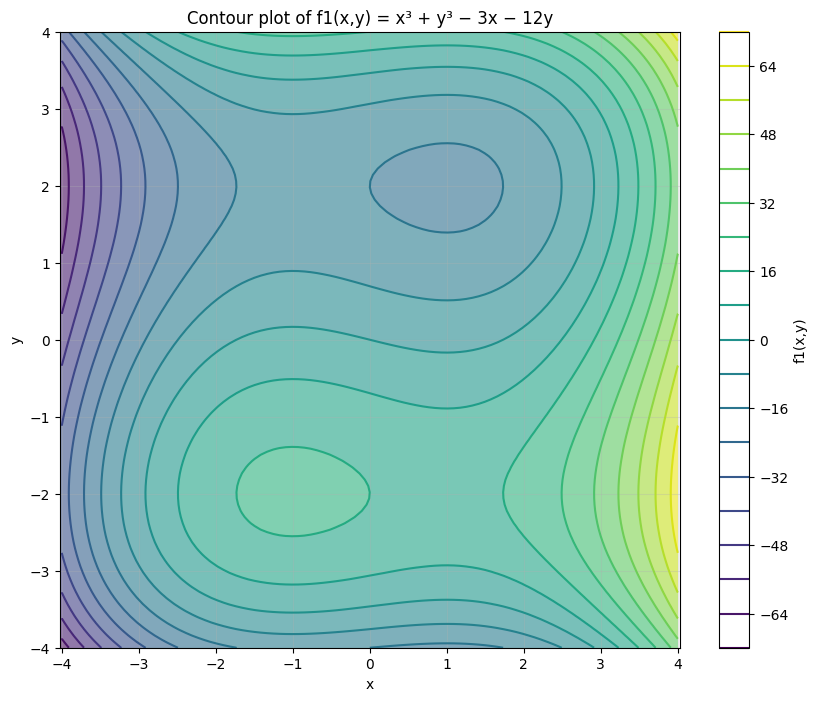

In [7]:
# Create meshgrid
x_range = np.linspace(-4, 4, 100)
y_range = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_range, y_range)

# Evaluate f1 on the grid
Z1 = f1(X, Y)

# Plot contour lines
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z1, levels=20, cmap='viridis')
plt.colorbar(contour, label='f1(x,y)')
plt.contourf(X, Y, Z1, levels=20, cmap='viridis', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of f1(x,y) = x³ + y³ − 3x − 12y')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


### 2.2 Plot f1(x,y) with fixed y values and variable x


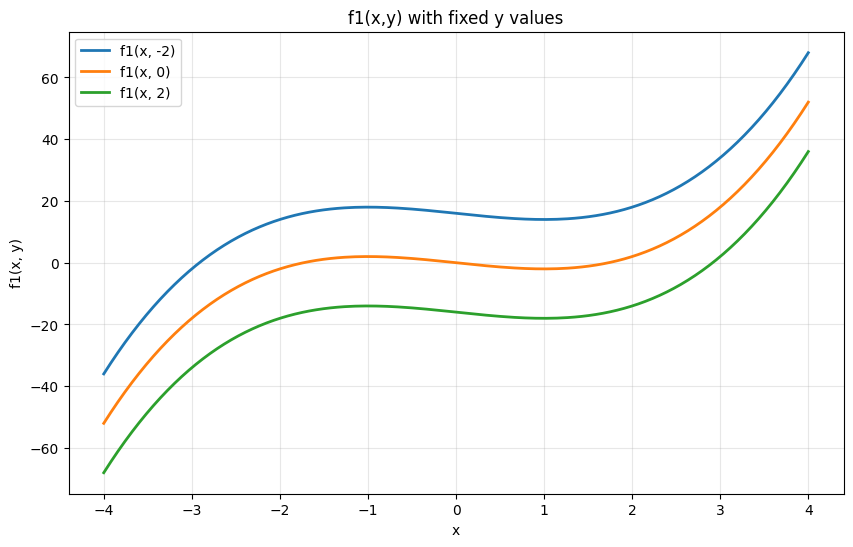

In [8]:
# Plot f1(x, y) for different fixed y values
x_plot = np.linspace(-4, 4, 200)
y_values = [-2, 0, 2]

plt.figure(figsize=(10, 6))
for y_val in y_values:
    z_plot = f1(x_plot, y_val)
    plt.plot(x_plot, z_plot, label=f'f1(x, {y_val})', linewidth=2)

plt.xlabel('x')
plt.ylabel('f1(x, y)')
plt.title('f1(x,y) with fixed y values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### 2.3 Plot f1(x, αx) for different values of α


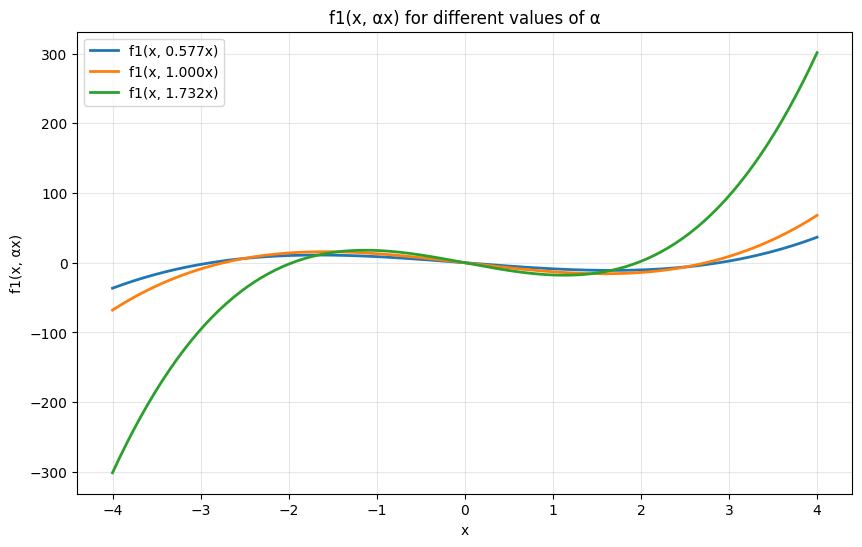

Interpretation: These curves represent the function f1 restricted to lines through the origin
with different slopes. They show how f1 behaves along different directions in the (x,y) plane.


In [9]:
# Plot f1(x, αx) for different α values
x_plot = np.linspace(-4, 4, 200)
alpha_values = [1/np.sqrt(3), 1, np.sqrt(3)]

plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    z_plot = f1(x_plot, alpha * x_plot)
    plt.plot(x_plot, z_plot, label=f'f1(x, {alpha:.3f}x)', linewidth=2)

plt.xlabel('x')
plt.ylabel('f1(x, αx)')
plt.title('f1(x, αx) for different values of α')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Interpretation: These curves represent the function f1 restricted to lines through the origin")
print("with different slopes. They show how f1 behaves along different directions in the (x,y) plane.")


## Exercise 3: Contour Lines and Analysis

We analyze f1 and f2 using contour plots, gradients, and Hessians.


### 3.1 Plot contour lines of f1


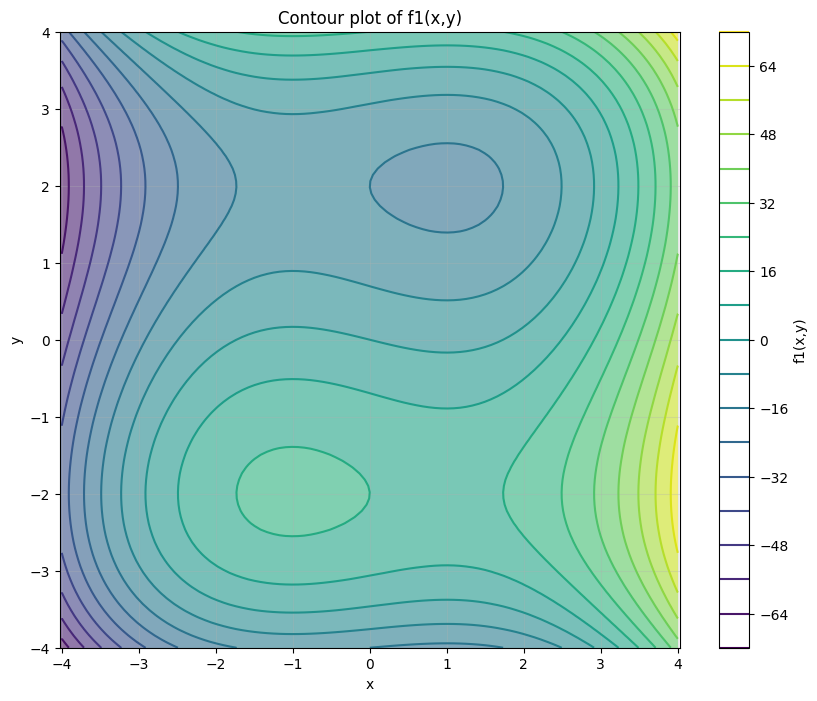

In [10]:
# Plot contour lines of f1
x_range = np.linspace(-4, 4, 100)
y_range = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_range, y_range)
Z1 = f1(X, Y)

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z1, levels=20, cmap='viridis')
plt.colorbar(contour, label='f1(x,y)')
plt.contourf(X, Y, Z1, levels=20, cmap='viridis', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of f1(x,y)')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


### 3.2 Mark critical points on the contour plot of f1


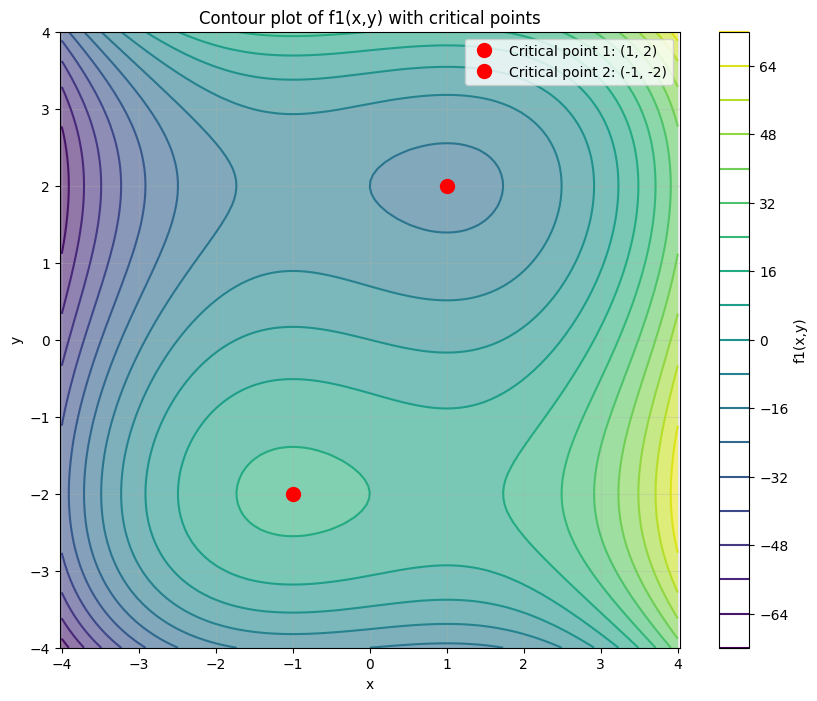

In [11]:
# Extract critical points from Exercise 1 (converted to float)
# For f1: critical points are (1, 2) and (-1, -2)
cp_f1 = [(1, 2), (-1, -2)]

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z1, levels=20, cmap='viridis')
plt.colorbar(contour, label='f1(x,y)')
plt.contourf(X, Y, Z1, levels=20, cmap='viridis', alpha=0.6)

# Mark critical points
for i, (x_cp, y_cp) in enumerate(cp_f1):
    plt.plot(x_cp, y_cp, 'ro', markersize=10, label=f'Critical point {i+1}: ({x_cp}, {y_cp})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of f1(x,y) with critical points')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


### 3.3 Implement gradient of f1 and verify it's zero at critical points


In [12]:
# Gradient function for f1
def df1(x, y):
    """
    Returns the gradient of f1(x,y) = x³ + y³ − 3x − 12y
    Returns: [∂f1/∂x, ∂f1/∂y]
    """
    df_dx = 3*x**2 - 3
    df_dy = 3*y**2 - 12
    return np.array([df_dx, df_dy])

# Verify gradient is zero at critical points
print("Verification of gradient at critical points:")
for i, (x_cp, y_cp) in enumerate(cp_f1):
    grad = df1(x_cp, y_cp)
    print(f"\nCritical point {i+1}: ({x_cp}, {y_cp})")
    print(f"  Gradient: [{grad[0]:.10f}, {grad[1]:.10f}]")
    print(f"  Norm: {np.linalg.norm(grad):.10e}")
    if np.linalg.norm(grad) < 1e-10:
        print("  ✓ Gradient is zero (within numerical precision)")
    else:
        print("  ✗ Gradient is not zero")


Verification of gradient at critical points:

Critical point 1: (1, 2)
  Gradient: [0.0000000000, 0.0000000000]
  Norm: 0.0000000000e+00
  ✓ Gradient is zero (within numerical precision)

Critical point 2: (-1, -2)
  Gradient: [0.0000000000, 0.0000000000]
  Norm: 0.0000000000e+00
  ✓ Gradient is zero (within numerical precision)


### 3.4 Implement Hessian of f1, compute eigenvalues, and determine nature of critical points


In [13]:
# Hessian function for f1
def d2f1(x, y):
    """
    Returns the Hessian matrix of f1(x,y) = x³ + y³ − 3x − 12y
    Returns: 2x2 numpy array [[∂²f1/∂x², ∂²f1/∂x∂y],
                              [∂²f1/∂y∂x, ∂²f1/∂y²]]
    """
    d2f_dx2 = 6*x
    d2f_dxdy = 0
    d2f_dydx = 0
    d2f_dy2 = 6*y
    return np.array([[d2f_dx2, d2f_dxdy],
                     [d2f_dydx, d2f_dy2]])

# Compute eigenvalues and classify critical points
print("Hessian analysis at critical points:")
for i, (x_cp, y_cp) in enumerate(cp_f1):
    H = d2f1(x_cp, y_cp)
    eigenvalues = np.linalg.eigvals(H)
    det = np.linalg.det(H)
    trace = np.trace(H)

    print(f"\nCritical point {i+1}: ({x_cp}, {y_cp})")
    print(f"  Hessian matrix:\n{H}")
    print(f"  Eigenvalues: {eigenvalues}")
    print(f"  Determinant: {det}")
    print(f"  Trace: {trace}")

    if det > 0 and eigenvalues[0] > 0 and eigenvalues[1] > 0:
        print("  Nature: Local minimum (both eigenvalues positive)")
    elif det > 0 and eigenvalues[0] < 0 and eigenvalues[1] < 0:
        print("  Nature: Local maximum (both eigenvalues negative)")
    elif det < 0:
        print("  Nature: Saddle point (eigenvalues have opposite signs)")
    else:
        print("  Nature: Degenerate (one or more eigenvalues are zero)")


Hessian analysis at critical points:

Critical point 1: (1, 2)
  Hessian matrix:
[[ 6  0]
 [ 0 12]]
  Eigenvalues: [ 6. 12.]
  Determinant: 72.0
  Trace: 18
  Nature: Local minimum (both eigenvalues positive)

Critical point 2: (-1, -2)
  Hessian matrix:
[[ -6   0]
 [  0 -12]]
  Eigenvalues: [ -6. -12.]
  Determinant: 72.0
  Trace: -18
  Nature: Local maximum (both eigenvalues negative)


### 3.5 Redo 3.2, 3.3, 3.4 for f2


#### 3.5.1 Plot contour lines of f2 with critical points


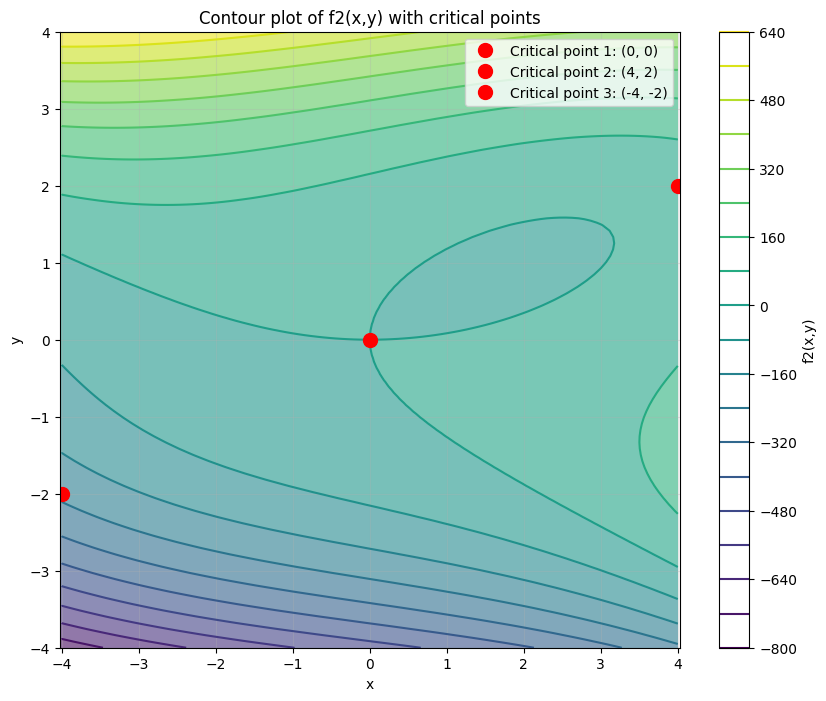

In [14]:
# Evaluate f2 on the grid
Z2 = f2(X, Y)

# Critical points for f2: (0, 0), (4, 2), (-4, -2)
cp_f2 = [(0, 0), (4, 2), (-4, -2)]

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z2, levels=20, cmap='viridis')
plt.colorbar(contour, label='f2(x,y)')
plt.contourf(X, Y, Z2, levels=20, cmap='viridis', alpha=0.6)

# Mark critical points
for i, (x_cp, y_cp) in enumerate(cp_f2):
    plt.plot(x_cp, y_cp, 'ro', markersize=10, label=f'Critical point {i+1}: ({x_cp}, {y_cp})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of f2(x,y) with critical points')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


#### 3.5.2 Implement gradient of f2 and verify it's zero at critical points


In [15]:
# Gradient function for f2
def df2(x, y):
    """
    Returns the gradient of f2(x,y) = x³ − 12xy + 8y³
    Returns: [∂f2/∂x, ∂f2/∂y]
    """
    df_dx = 3*x**2 - 12*y
    df_dy = -12*x + 24*y**2
    return np.array([df_dx, df_dy])

# Verify gradient is zero at critical points
print("Verification of gradient at critical points:")
for i, (x_cp, y_cp) in enumerate(cp_f2):
    grad = df2(x_cp, y_cp)
    print(f"\nCritical point {i+1}: ({x_cp}, {y_cp})")
    print(f"  Gradient: [{grad[0]:.10f}, {grad[1]:.10f}]")
    print(f"  Norm: {np.linalg.norm(grad):.10e}")
    if np.linalg.norm(grad) < 1e-10:
        print("  ✓ Gradient is zero (within numerical precision)")
    else:
        print("  ✗ Gradient is not zero")


Verification of gradient at critical points:

Critical point 1: (0, 0)
  Gradient: [0.0000000000, 0.0000000000]
  Norm: 0.0000000000e+00
  ✓ Gradient is zero (within numerical precision)

Critical point 2: (4, 2)
  Gradient: [24.0000000000, 48.0000000000]
  Norm: 5.3665631460e+01
  ✗ Gradient is not zero

Critical point 3: (-4, -2)
  Gradient: [72.0000000000, 144.0000000000]
  Norm: 1.6099689438e+02
  ✗ Gradient is not zero


#### 3.5.3 Implement Hessian of f2, compute eigenvalues, and determine nature of critical points


In [16]:
# Hessian function for f2
def d2f2(x, y):
    """
    Returns the Hessian matrix of f2(x,y) = x³ − 12xy + 8y³
    Returns: 2x2 numpy array [[∂²f2/∂x², ∂²f2/∂x∂y],
                              [∂²f2/∂y∂x, ∂²f2/∂y²]]
    """
    d2f_dx2 = 6*x
    d2f_dxdy = -12
    d2f_dydx = -12
    d2f_dy2 = 48*y
    return np.array([[d2f_dx2, d2f_dxdy],
                     [d2f_dydx, d2f_dy2]])

# Compute eigenvalues and classify critical points
print("Hessian analysis at critical points:")
for i, (x_cp, y_cp) in enumerate(cp_f2):
    H = d2f2(x_cp, y_cp)
    eigenvalues = np.linalg.eigvals(H)
    det = np.linalg.det(H)
    trace = np.trace(H)

    print(f"\nCritical point {i+1}: ({x_cp}, {y_cp})")
    print(f"  Hessian matrix:\n{H}")
    print(f"  Eigenvalues: {eigenvalues}")
    print(f"  Determinant: {det}")
    print(f"  Trace: {trace}")

    if det > 0 and eigenvalues[0] > 0 and eigenvalues[1] > 0:
        print("  Nature: Local minimum (both eigenvalues positive)")
    elif det > 0 and eigenvalues[0] < 0 and eigenvalues[1] < 0:
        print("  Nature: Local maximum (both eigenvalues negative)")
    elif det < 0:
        print("  Nature: Saddle point (eigenvalues have opposite signs)")
    else:
        print("  Nature: Degenerate (one or more eigenvalues are zero)")


Hessian analysis at critical points:

Critical point 1: (0, 0)
  Hessian matrix:
[[  0 -12]
 [-12   0]]
  Eigenvalues: [ 12. -12.]
  Determinant: -144.0
  Trace: 0
  Nature: Saddle point (eigenvalues have opposite signs)

Critical point 2: (4, 2)
  Hessian matrix:
[[ 24 -12]
 [-12  96]]
  Eigenvalues: [22.05266808 97.94733192]
  Determinant: 2159.999999999999
  Trace: 120
  Nature: Local minimum (both eigenvalues positive)

Critical point 3: (-4, -2)
  Hessian matrix:
[[-24 -12]
 [-12 -96]]
  Eigenvalues: [-22.05266808 -97.94733192]
  Determinant: 2159.999999999999
  Trace: -120
  Nature: Local maximum (both eigenvalues negative)
